# Cerebral cortex by ET Rolls

## Appendix D.2 Autoassociative network

* Adapted from (c) E T Rolls www.oxcns.org 2015
* The background to these networks is provided in
* Rolls ET (2016) Cerebral Cortex: Principles of Operation (Oxford University Press) Appendix 2 (B)
* which is available at http://www.oxcns.org by following the link to the book.
* The instructions and exercises for this code are in 
* Rolls ET (2016) Cerebral Cortex: Principles of Operation (Oxford University Press) Appendix 4 (D) 
* which is available at http://www.oxcns.org by following the link to the book.
* The background to these networks is also available in
* Rolls ET (2008) Memory, % Attention and Decision-Making (Oxford University Press) Appendix 2, 
* which is *available at
http://www.oxcns.org/papers/RollsMemoryAttentionAndDecisionMakingContents+Appendices1+2.pdf

## Purpose of this notebook is rewriting the original matlab code to python code

* From AutoAssociationDemo.m 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Preparation of hyperparapmeter of network

In [2]:
N = 100            # number of neurons in the fully connected autoassociation net
nSyn = N           # number of synapses on each neuron
SynMat = np.zeros((nSyn, N)) # (Synapses = Rows, neurons = Columns)
nPatts = 10        # the number of training and testng patterns. Suggest 10 for sparseness = 0.5, 
                   # and 30 for sparseness = 0.1
Learnrate = 1 / nPatts  # Not of especial significance in an autoassociation network, 
                       # but this keeps the weights within a range 
Sparseness = 0.5   # the sparseness of the trained representation, 
                    # i.e. the proportion of neurons that have high firing rates of 1
                    # Investigate values of 0.5 and 0.1
nFlipBits = 14     # The number of bits that are flipped to produce distorted recall cues.
                    # It is suggested that this be set to close to 0.2 * N * Sparseness
nepochs = 9       # the number of times that the network is allowed to update during testng


### Making Random binary pattern

In [3]:
TrainPatts = np.zeros((N, nPatts))
number_of_fired = int(N * Sparseness)

for patt in range(nPatts):
    TrainPatts[0:number_of_fired, patt] = 1 
    p = np.random.permutation(N)
    TrainPatts[:, patt] = TrainPatts[p, patt]


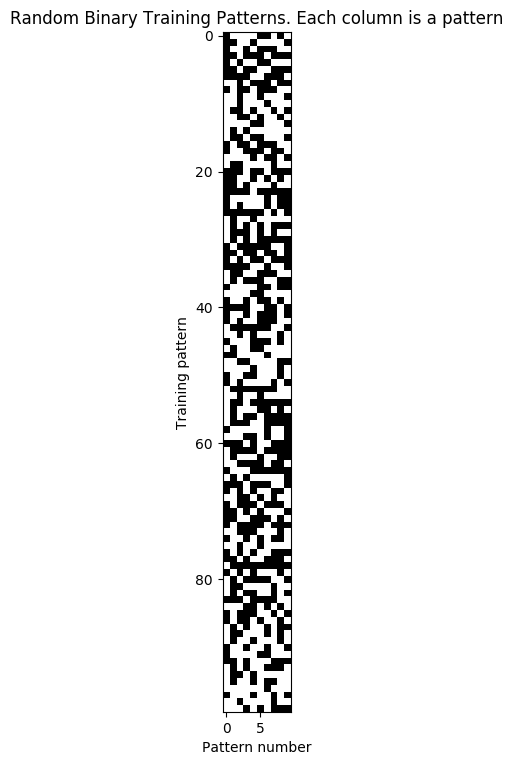

In [4]:
fig=plt.figure(figsize=(9, 9), dpi= 100, facecolor='w', edgecolor='k')
plt.title('Random Binary Training Patterns. Each column is a pattern')
plt.xlabel('Pattern number')
plt.ylabel('Training pattern')
plt.imshow(TrainPatts, interpolation="nearest", cmap="gray")

### Making test pattern with some bits filpped from the training patterns

In [5]:
TrainPattsFlipped = np.copy(TrainPatts)

In [6]:
for patt in range(nPatts):
    synarray = np.random.permutation(nSyn)
    print(synarray)
    el = 0
    for bit in range(nFlipBits):
        while TrainPatts[synarray[el], patt] != 1.0: # pass 0
            el += 1
            if el > nSyn:
                print("Error: too many bits being flipped")
                el = 0
        TrainPattsFlipped[synarray[el], patt] = 0 # Flip the bit   
        el +=1
    synarray = np.random.permutation(nSyn)
    el = 0
    for bit in range(nFlipBits):
        while TrainPatts[synarray[el], patt] != 0.0: # pass 1
            el += 1
            if el > nSyn:
                print("Error: too many bits being flipped")
                el = 0
        TrainPattsFlipped[synarray[el], patt] = 1 # Flip the bit
        el +=1


[62 46  8 13 45 22 63 67 79 34 55 87 41 33 39 25 15 10 60 99 57 54 27 81 70
 32 74 20 50  0 40 30 68 77 49  9 24 64 21 76 96 53 98 56 71 91 75 44  6  5
 26 85 36 69 14 43 66 89  2 95 92 31 48 80 23 17 82 29 65 84 12 86 72  4 37
 52 73 59 11 42  3 16 19 78 18 83 51 88  1 58 38 35 97 90 47 93 28 94  7 61]
[32 24 30 70 29 56 26  7 48 99 88 55 86 94 22 10 39  5 98 95  2 36 47 18 17
 38 44 15 49 78 93 90 80 41 82 13 52 75 77 63 84 87 81 21 57 61 62  9 46 14
 40 23 69 53 25 96 42  1 71 11 33 19 51  3 91 92  0 85 34 68 73 27  6 58 67
  8 66 45 43 31 59 35 28 20 60 16 65 97 37 74  4 72 50 64 76 54 83 79 89 12]
[ 0 55 54 68  1 25 16 80 53 76 28 90 82 61 38 78 30 27 62 86 33 26 92  9 99
 45 14 97 56 72 24 49 64 12 91 11 73 19 58 52  5  8 41  3 57 10 22 34  7 94
 74 17 36 13 35 84 95 88 79 60 87 59  2 40 75 77 42 67 70 81 48 51 66 15 71
 37 47 65 32 83 23 44 96 31 50 29 21 85  6 89 93  4 39 46 63 43 18 69 98 20]
[82 21 38 90 84 39  3 41 86 75 76 54 45 64 70  2  4 80 33 19 65 98 40 73 85
 26 43 34

In [50]:
TrainPatts[79,9] 

1.0

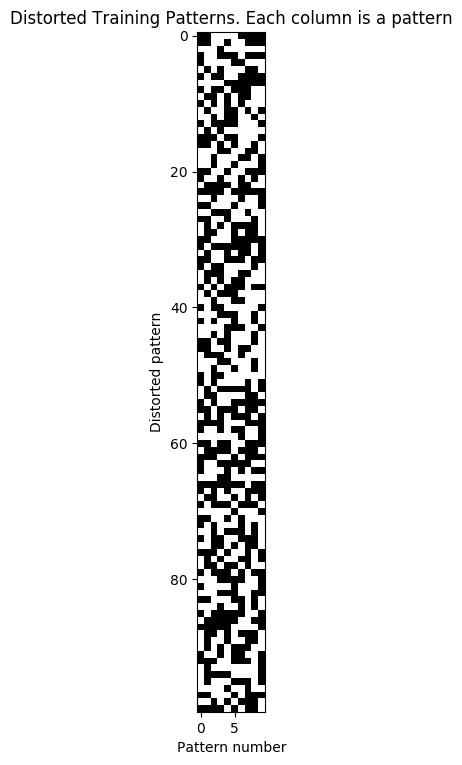

In [7]:
fig=plt.figure(figsize=(9, 9), dpi= 100, facecolor='w', edgecolor='k')
plt.title('Distorted Training Patterns. Each column is a pattern')
plt.xlabel('Pattern number')
plt.ylabel('Distorted pattern')
plt.imshow(TrainPattsFlipped, interpolation="nearest", cmap="gray")

### Train the synaptic matrix

NameError: name 'pause' is not defined

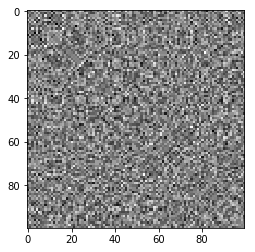

In [16]:
for patt in range(nPatts):
    for neuron in range(N):
        postSynRate = TrainPatts[neuron, patt]
        for syn in range(nSyn):
            if syn != neuron: # avoid self connection of recurrent collateral axon
                preSynRate = TrainPatts[syn, patt]
                weight_change = Learnrate * (postSynRate - Sparseness) * (preSynRate - Sparseness)
                # weight_change = Learnrate * postSynRate * preSynRate
                # weight_change = Learnrate * postSynRate * (preSynRate - Sparseness)
                SynMat[syn, neuron] = SynMat[syn, neuron] + weight_change
                
    

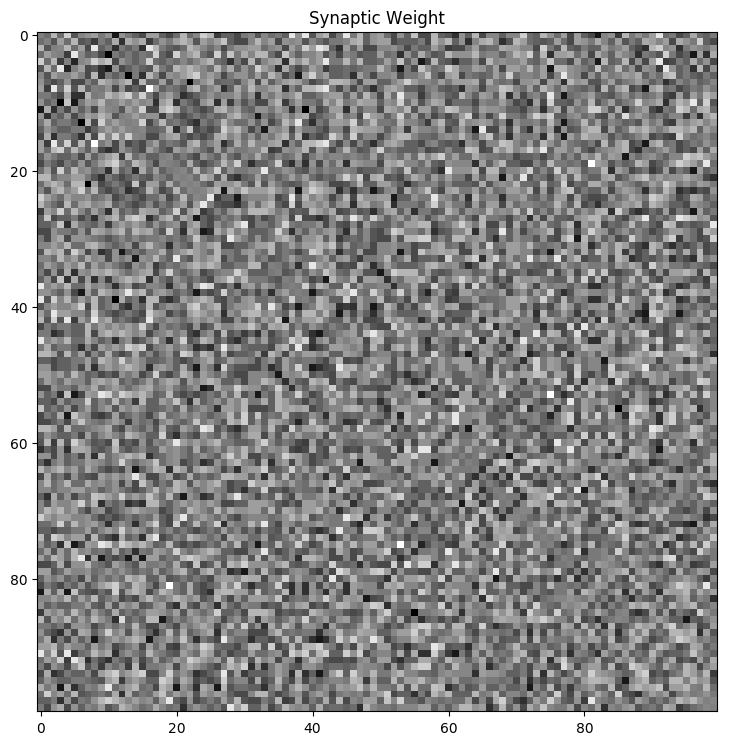

In [17]:
fig=plt.figure(figsize=(9, 9), dpi= 100, facecolor='w', edgecolor='k')
plt.title('Synaptic Weight')
# plt.xlabel('Pattern number')
# plt.ylabel('Distorted pattern')
plt.imshow(SynMat, interpolation="nearest", cmap="gray")

### Test the synaptic matrix

In [262]:
nCorrect = 0
for patt in range(nPatts):
    Rate = np.zeros((1,N))
    for epoch in range(nepochs):
        if epoch <= 0:
            clamp = 1
        else:
            clamp = 0
        Actvn = np.zeros((1, N))
        for neuron in range(N):
            PreSynInput = np.add(np.transpose(Rate), (TrainPattsFlipped[:, patt].reshape(N, 1) * clamp))
            Actvn[0, neuron] = float(np.inner(PreSynInput.reshape(1, N), SynMat[:, neuron]))
        scale = 1.0 / (np.max(Actvn) - np.min(Actvn))
        Actvn = (Actvn - np.min(Actvn)) * scale
        Actvn_sorted = np.sort(Actvn.reshape(100))[::-1]
        el = round(N * Sparseness)
        if el < 1:
            el = 1
        Threshold = Actvn_sorted[el]
        Rate = np.copy(Actvn)
        for neuron in range(np.size(Rate)):
            if Rate[0, neuron] >= Threshold:
                Rate[0, neuron] = 1
            else:
                Rate[0, neuron] = 0
        corr_coef = np.min(np.corrcoef(TrainPatts[:, patt], Rate))
    if corr_coef > 0.98:
        nCorrect += 1
PercentCorrect = nCorrect / nPatts * 100
print(PercentCorrect)
    

70.0
